# Assignment 1: Predicting Employee Attrition with Random Forests

Execute cells **top to bottom**. Where you see `# TODO`, add your code.

**Data:** `data/IBM_HR_Employee_Attrition.csv`

**Deliverables produced in this file:**
- Baseline Decision Tree metrics (accuracy, precision, recall)
- Random Forest metrics + side-by-side comparison table
- Feature importance visualization
- Markdown sections for **Key Drivers of Attrition** and **Reflection**

### Download Dependencies
Run this cell once to install all dependencies. These can also be run directly in the terminal if you prefer.


In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------  9.7/9.7 MB 54.9 MB/s eta 0:00:01
   ---------------------------------------- 9.7/9.7 MB 46.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ---------------------------------------  12.1/12.3 MB 63.1 MB/s eta 0:00:01
   ---------------------------------------- 12.3/12.3 MB 55.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 63.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 8.0/8.0 MB 49.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 64.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
print("Importing required libraries...")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

print("✓ All libraries imported successfully!\n")

Importing required libraries...
✓ All libraries imported successfully!



### Step 1: Load the dataset
----------------------------------------------------------------------------
Confirm the CSV can be read and preview the first rows. The following code should output the first 5 rows of the IBM HR data.

In [4]:
# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
print("Loading employee attrition dataset...")
df = pd.read_csv('./data/IBM_HR_Employee_Attrition.csv')
print("✓ Dataset loaded successfully!\n")

# Display first few rows to verify load
print("First 5 rows of the dataset:")
print(df.head())

# Display basic info about the dataset
print("\nDataset Information:")
print(df.info())

print("\n" + "="*80)
print("CHECKPOINT: Verify that the dataset loaded correctly and you can see column names")
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("="*80 + "\n")

Loading employee attrition dataset...
✓ Dataset loaded successfully!

First 5 rows of the dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical           

### Step 2: Explore and Prepare the Dataset
----------------------------------------------------------------------------
Perform the same kind of exploratory analysis real data scientists do before building a model

<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   str  
 2   BusinessTravel            1470 non-null   str  
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   str  
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   str  
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   str  
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null   int64
 15

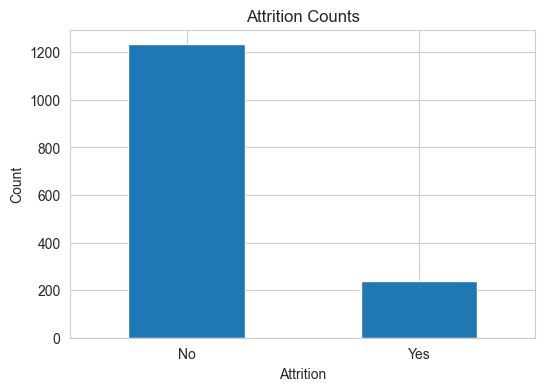

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_No',
       'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gen

In [18]:
# Display summary statistics
# TODO: Use df.describe() and df.info() to generate summary statistics for numeric features
df.describe()
df.info()


# Plot attrition counts to see class imbalance
# TODO: Use df['Attrition'].value_counts() and create a visualization using matplotlib to see how imbalanced the dataset is
import matplotlib.pyplot as plt
attrition_counts = df['Attrition'].value_counts()
plt.figure(figsize=(6, 4))
attrition_counts.plot(kind='bar')
plt.title('Attrition Counts')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Encode categorical variables
# TODO: Use pd.get_dummies() to encode categorical variables
# Store the result in a variable (you'll need this for the next step)
dummies = pd.get_dummies(df)
print(dummies.columns)


# Split features (X) from target (y)
# TODO: Create X_cleaned with all columns except 'Attrition'
# TODO: Create y with just the 'Attrition' column
X_cleaned = dummies.drop(['Attrition_Yes', 'Attrition_No'], axis=1)  # Replace with your feature matrix
y = dummies['Attrition_Yes']  # Replace with your target variable


print("\n" + "="*80)
print("CHECKPOINT: X_cleaned should have all numeric columns, y should contain Attrition values")
print(f"X_cleaned shape: {X_cleaned.shape if X_cleaned is not None else 'Not yet defined'}")
print(f"y shape: {y.shape if y is not None else 'Not yet defined'}")
print("="*80 + "\n")

### Step 3: Train a Baseline Decision Tree Model
----------------------------------------------------------------------------
Build a baseline decision tree for comparison

In [19]:
# Split data into training and test sets
# TODO: Use train_test_split with test_size=0.2, random_state=42, stratify=y
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42, stratify=y)  # Replace with train_test_split()

# Train a decision tree classifier
# TODO: Initialize DecisionTreeClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)  # Replace with DecisionTreeClassifier

# TODO: Fit the model on training data
dt_model.fit(X_train, y_train)


# Make predictions on test set
# TODO: Use dt_model.predict() on X_test
dt_predictions = dt_model.predict(X_test)  # Replace with predictions

# Calculate evaluation metrics
# TODO: Calculate accuracy, precision, and recall for the decision tree
dt_accuracy = accuracy_score(y_test, dt_predictions)  # Replace with accuracy_score()
dt_precision = precision_score(y_test, dt_predictions)  # Replace with precision_score()
dt_recall = recall_score(y_test, dt_predictions)  # Replace with recall_score()

# Print results
print("\n" + "="*80)
print("BASELINE DECISION TREE RESULTS")
print("="*80)
# TODO: Print accuracy, precision, and recall with clear labels
print(f"Accuracy: {dt_accuracy if dt_accuracy is not None else 'Not yet calculated'}")
print(f"Precision: {dt_precision if dt_precision is not None else 'Not yet calculated'}")
print(f"Recall: {dt_recall if dt_recall is not None else 'Not yet calculated'}")
print("="*80 + "\n")


BASELINE DECISION TREE RESULTS
Accuracy: 0.7789115646258503
Precision: 0.3269230769230769
Recall: 0.3617021276595745



### Step 4: Build and Evaluate a Random Forest Model
----------------------------------------------------------------------------
Move beyond a single tree to a more powerful ensemble model

In [21]:
# Move beyond a single tree to a more powerful ensemble model

# Train a random forest classifier
# TODO: Initialize and train a RandomForestClassifier with these parameters:
# n_estimators=200, max_depth=None, min_samples_split=10, min_samples_leaf=2,
# max_features='sqrt', class_weight='balanced', random_state=42
rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=10, min_samples_leaf=2, max_features='sqrt', class_weight='balanced', random_state=42)  # Replace with trained RandomForestClassifier

# Make predictions using probability threshold
# TODO: Use rf_model.predict_proba() to get probabilities for the positive class
# TODO: Apply a threshold of 0.35 to convert probabilities to predictions
# (rf_probabilities >= 0.35).astype(int)
rf_model.fit(X_train, y_train)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]
rf_predictions = (rf_probabilities >= 0.35).astype(int)  # Replace with threshold-adjusted predictions

# Calculate evaluation metrics
# TODO: Calculate accuracy, precision, and recall for the random forest
rf_accuracy = accuracy_score(y_test, rf_predictions)  # Replace with accuracy_score()
rf_precision = precision_score(y_test, rf_predictions)  # Replace with precision_score()
rf_recall = recall_score(y_test, rf_predictions)  # Replace with recall_score()

# Print results
print("\n" + "="*80)
print("RANDOM FOREST RESULTS")
print("="*80)
print(f"Accuracy: {rf_accuracy if rf_accuracy is not None else 'Not yet calculated'}")
print(f"Precision: {rf_precision if rf_precision is not None else 'Not yet calculated'}")
print(f"Recall: {rf_recall if rf_recall is not None else 'Not yet calculated'}")
print("="*80 + "\n")

# Create comparison table
# TODO: Create a pandas DataFrame comparing both models side-by-side
# Columns: Model, Accuracy, Precision, Recall
model_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [dt_accuracy, rf_accuracy],
    'Precision': [dt_precision, rf_precision],
    'Recall': [dt_recall, rf_recall]
})  # Replace with DataFrame

# TODO: Display the comparison table
print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
# Display table here
print(model_comparison)
print("="*80 + "\n")


RANDOM FOREST RESULTS
Accuracy: 0.7993197278911565
Precision: 0.4090909090909091
Recall: 0.574468085106383


MODEL COMPARISON
           Model  Accuracy  Precision    Recall
0  Decision Tree  0.778912   0.326923  0.361702
1  Random Forest  0.799320   0.409091  0.574468



### Step 5: Interpret Feature Importances
----------------------------------------------------------------------------
Turn model results into actionable insights for HR

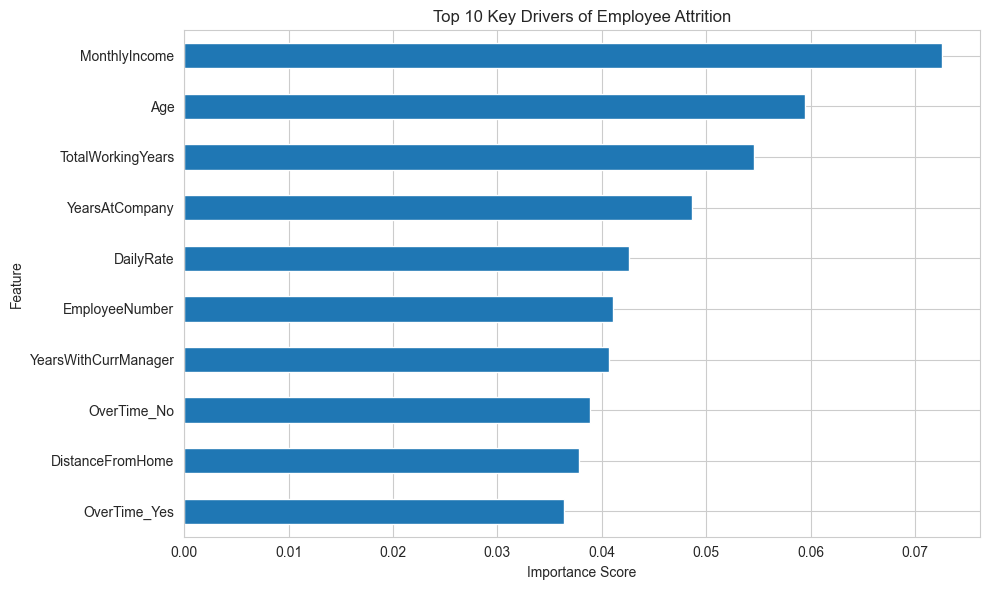


KEY DRIVERS OF ATTRITION


In [22]:
# Extract feature importances
# TODO: Get feature_importances_ from rf_model and create a pandas Series
# with feature names as index
feature_importances = pd.Series(
    rf_model.feature_importances_, 
    index=X_cleaned.columns
).sort_values(ascending=False)  # Replace with Series of importances

# TODO: Sort feature importances in descending order
feature_importances.sort_values(ascending=False)

# TODO: Get top 10 most important features
top_10_features = feature_importances.head(10)  # Replace with top 10

# Visualize top 10 feature importances
# TODO: Create a horizontal bar plot of the top 10 features
# Use plt.barh() or top_10_features.plot(kind='barh')
top_10_features.plot(kind='barh')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Key Drivers of Employee Attrition')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()  # To display the highest importance at the top

print("\n" + "="*80)
print("KEY DRIVERS OF ATTRITION")
print("="*80)

#### Key Drivers of Attrition
Write 3-5 bullet points explaining what the top factors reveal. Include at least one actionable takeaway for HR
- The main reason for employee attrition is MonthlyIncome. 
- Employees who haven't been at the company a long time are more likely to leave. 
- Quick management changes lead to higher employee attrition.  
- Investing in manager training can be very good for the company to keep a long term manager therefore less employee attrition. 

### Step 6: Reflection (150-200 words)
----------------------------------------------------------------------------
Write a 150-200 word reflection addressing:
- How the random forest improved upon the decision tree baseline
- When ensemble methods are worth the added complexity
- How these modeling skills connect to your final project

The random forest improved compared to the decision tree because the baseline tree originally relied on one model which could cause overfitting. The accuracy went up 2%, the and the recall went up 19%.  We want to use ensemble methods when we want more accuracy in our data. Singular decision trees may be easier for interpretability, but you can use ensemble methods when accuracy and stability are more important the interpretability, or if you do not have enough data or complex data. These modeling skills can connect to our final project because the project contains a model comparision and example predictions which is essentially what we were doing in this assignment. 

### Step 7: Push to GitHub
----------------------------------------------------------------------------
Once complete, save and push your work:
1. Save this file
2. Run in terminal:
```sh
git add .
git commit -m 'completed employee attrition assignment'
git push
```